# Why Python? A Hands-On Comparison with JASP

You just learned how to run statistical tests in JASP. Now let's do the **exact same tests** in Python and see what we gain.

## Why bother with code when JASP exists?

JASP is excellent for learning statistical concepts and running quick analyses. Python offers additional capabilities that become valuable as your research grows:

| | JASP (GUI) | Python (Code) |
|---|---|---|
| **Reproducibility** | Need to remember which buttons you clicked | Save code, run again anytime — same result guaranteed |
| **Automation** | Analyze 50 brain regions? Click 50 times | Write a loop — done in seconds |
| **Flexibility** | Limited to built-in options | Create any analysis you can describe |
| **Transparency** | Results appear; steps are hidden | You control (and can inspect) each step |
| **Sharing** | Colleague needs JASP installed | Share a .py file or notebook, anyone can run it|
| **Scale** | Great for one dataset at a time | Process thousands of files overnight |

**Transferable skills:** Learning Python for statistics opens doors to machine learning, neuroimaging analysis, bioinformatics, finance, web development, and more. The syntax you learn today applies across all these fields.

**Bottom line:** JASP is great for learning concepts and quick checks. Python gives you power and flexibility for real research.

Let's prove it. We'll replicate everything you just did in JASP — and then go further.

---

## Part 1: Setup and Loading Data

First, let's load the Python libraries we need. Think of libraries as toolboxes — each one gives us specific capabilities.

In [77]:
# Import the libraries we'll use throughout this lab
# Each line loads a different "toolbox" of functions

import pandas as pd              # pandas: for loading and working with data tables
import numpy as np               # numpy: for numerical calculations
import matplotlib.pyplot as plt  # matplotlib: for creating basic plots
import seaborn as sns            # seaborn: for prettier statistical plots
import scipy.stats as stats      # scipy.stats: for statistical tests

# --- Colab Setup: Download data files from GitHub ---
# This cell automatically downloads the data files if running in Google Colab
import os
if 'google.colab' in str(get_ipython()) or not os.path.exists('class_data_undergrad.xlsx'):
    import urllib.request
    base_url = 'https://raw.githubusercontent.com/cmahlen/python-stats-demo/main/'
    files = ['class_data_undergrad.xlsx', 'ttest_data.xlsx']
    for f in files:
        if not os.path.exists(f):
            print(f"Downloading {f}...")
            urllib.request.urlretrieve(base_url + f, f)
    print("Data files ready!")
else:
    print("Using local data files")

print("Libraries loaded successfully!")

Using local data files
Libraries loaded successfully!


### The Study

A pharmacology experiment examining how dopaminergic drugs affect locomotor activity in rodents.

**Dependent Variable**: Number of squares entered in an open-field test (measure of locomotion)

**Independent Variables** (8 drug treatment groups):
- **Control**: No drug (baseline)
- **Amph**: Amphetamine (dopamine releaser — increases locomotion)
- **Res only**: Reserpine (depletes dopamine — decreases locomotion)
- **Res+Amph**: Can amphetamine overcome reserpine's effects?
- **Res+MT**: Reserpine + alpha-methyltyrosine (blocks dopamine synthesis)
- **Res+MT+Amph**: Triple combination
- **Res+MT+DOPA**: L-DOPA (dopamine precursor) to restore function?
- **Res+MT+Amph+DOPA**: Maximum restoration attempt

### Loading Data: The Peek-Then-Use Pattern

**Good habit:** Always look at your data before analyzing it! This helps you catch problems early.

We use `pd.read_excel()` to load Excel files. The `pd.` part means "use the pandas library."

In [44]:
# Load the ANOVA dataset from an Excel file
# pd.read_excel() reads the file and stores it in a variable called anova_df
# "df" is short for "DataFrame" — pandas' name for a data table

anova_df = pd.read_excel('class_data_undergrad.xlsx')

# .head() shows the first 5 rows — a quick peek at your data
# This is your first sanity check: do the columns look right?
anova_df.head()

,Squares entered,Group
0,54,Control
1,30,Control
2,35,Control
3,18,Control
4,32,Control


In [68]:
# You can also look at the last five rows with .tail()
anova_df.tail()

,Squares entered,Group
105,0,Res+MT+DOPA
106,0,Res+MT+DOPA
107,1,Res+MT+DOPA
108,0,Res+MT+DOPA
109,0,Res+MT+DOPA


In [69]:
# More quality checks — always do these after loading data!

print("DATA QUALITY CHECK")
print("=" * 40)

# len() counts how many rows
print(f"Number of rows: {len(anova_df)}")

# .columns gives us the column names
print(f"Column names: {list(anova_df.columns)}")

# .isna().sum().sum() counts ALL missing values in the entire dataset
print(f"Missing values: {anova_df.isna().sum().sum()}")

# .unique() shows all the different values in a column
print(f"Groups in the data: {anova_df['Group'].unique()}")

DATA QUALITY CHECK
Number of rows: 110
Column names: ['Squares entered', 'Group']
Missing values: 0
Groups in the data: ['Control' 'Amph' 'Res+MT' 'Res+MT+Amph' 'Res+MT+Amph+DOPA' 'Res only'
 'Res+Amph' 'Res+MT+DOPA']


### Visualize Before Analyzing!

**Good habit:** Always plot your data before running statistics. Visualizations help you:
- Spot outliers or data entry errors
- See the pattern before confirming it with numbers
- Choose the right statistical test

We'll use a **swarm plot** which shows every individual data point. This is better than a box plot because you see the *actual data*, not just a summary.

/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the poi

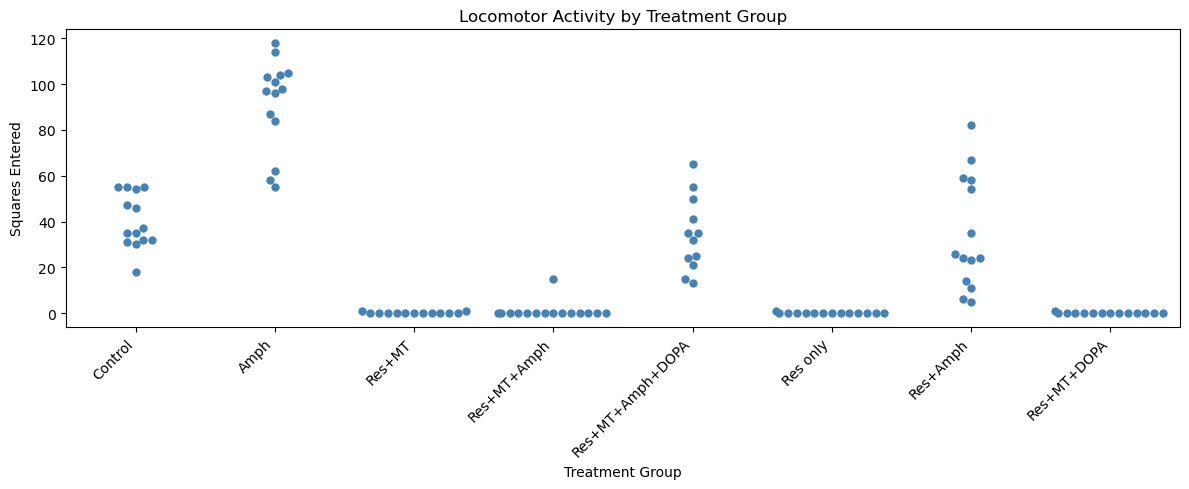

What patterns do you notice? Which groups look different from Control?

Try changing the color to 'coral' or 'forestgreen' and re-run the cell!

You might notice there is a warning telling you to use stripplot.

Try it! Replace swarmplot with stripplot.


In [70]:
# Create a swarm plot showing every data point
# sns.swarmplot() is from seaborn — it plots each observation as a dot

plt.figure(figsize=(12, 5))  # figsize sets the width and height in inches

sns.swarmplot(data=anova_df,           # which dataset to use
              x='Group',                # what goes on the x-axis
              y='Squares entered',      # what goes on the y-axis
              color='steelblue',        # color of the dots (try 'red', 'green', etc.!)
              size=6)                   # size of each dot (try 4, 8, 10!)

plt.xticks(rotation=45, ha='right')  # rotate x labels so they don't overlap
plt.title('Locomotor Activity by Treatment Group')
plt.ylabel('Squares Entered')
plt.xlabel('Treatment Group')
plt.tight_layout()  # prevents labels from getting cut off
plt.show()

print("What patterns do you notice? Which groups look different from Control?")
print("\nTry changing the color to 'coral' or 'forestgreen' and re-run the cell!")
print("\nYou might notice there is a warning telling you to use stripplot.")
print("\nTry it! Replace swarmplot with stripplot.")

You can use virtually infinitely many colors here. For just some, check out 

https://matplotlib.org/stable/gallery/color/named_colors.html

In [47]:
# Calculate descriptive statistics by group
# This is what JASP calls "Descriptives"

# .groupby('Group') splits the data by treatment group
# ['Squares entered'] selects just that column
# .agg() calculates multiple statistics at once

descriptives = anova_df.groupby('Group')['Squares entered'].agg(['count', 'mean', 'std'])

# Rename columns to be clearer
descriptives.columns = ['N', 'Mean', 'SD']

# Round to 2 decimal places for readability
descriptives = descriptives.round(2)

# Reorder groups logically (not alphabetically)
group_order = ['Control', 'Amph', 'Res only', 'Res+Amph', 'Res+MT', 'Res+MT+Amph', 'Res+MT+DOPA', 'Res+MT+Amph+DOPA']
descriptives = descriptives.reindex(group_order)

print("Descriptive Statistics by Treatment Group")
print("=" * 50)
print(descriptives.to_string())
print("\nCompare with your JASP output!")

Descriptive Statistics by Treatment Group
                   N   Mean     SD
Group                             
Control           14  40.14  11.79
Amph              14  91.57  20.12
Res only          14   0.07   0.27
Res+Amph          14  34.86  24.69
Res+MT            13   0.15   0.38
Res+MT+Amph       15   1.00   3.87
Res+MT+DOPA       14   0.07   0.27
Res+MT+Amph+DOPA  12  34.25  16.14

Compare with your JASP output!


---

## Part 2: T-Tests

Now let's load a different dataset for t-tests. This one compares a "New" treatment to an "Old" treatment.

In [48]:
# Load the t-test data
# This file has two columns: 'New' and 'Old'

ttest_df = pd.read_excel('ttest_data.xlsx')

# Always peek at your data first!
print("First few rows:")
print(ttest_df.head())

print(f"\nNumber of rows: {len(ttest_df)}")
print(f"Columns: {list(ttest_df.columns)}")

First few rows:
   New   Old
0   13  12.0
1   17   8.0
2   19   6.0
3   10  16.0
4   20  12.0

Number of rows: 11
Columns: ['New', 'Old']


In [49]:
# Extract the two groups as separate arrays
# .dropna() removes any missing values (NaN)
# .values converts from pandas Series to numpy array

new_data = ttest_df['New'].dropna().values
old_data = ttest_df['Old'].dropna().values

# Check that we got the data
print(f"New group: n={len(new_data)}, mean={new_data.mean():.2f}, SD={new_data.std(ddof=1):.2f}")
print(f"Old group: n={len(old_data)}, mean={old_data.mean():.2f}, SD={old_data.std(ddof=1):.2f}")

New group: n=11, mean=14.91, SD=3.59
Old group: n=10, mean=11.10, SD=4.33


### Visualize Before Testing

Before running any statistical test, we should look at the data. Let's create a histogram to see the distribution of each group.

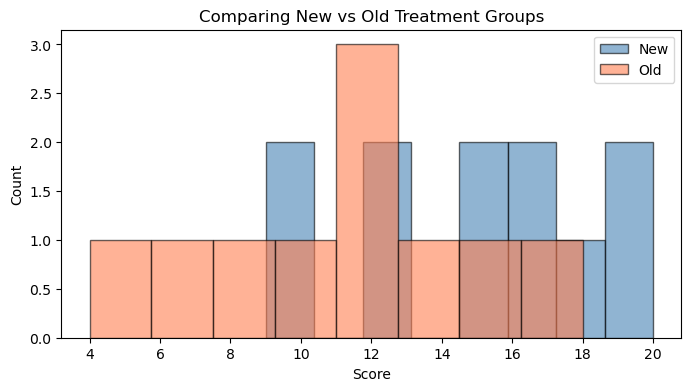

Try changing bins=8 to bins=5 or bins=15 and see how the plot changes!
Try changing alpha=0.6 to alpha=0.3 or alpha=0.9!


In [50]:
# Create overlapping histograms to compare distributions
# plt.hist() creates a histogram

plt.figure(figsize=(8, 4))

# Plot both groups on the same axes
# alpha controls transparency (0=invisible, 1=solid) — try different values!
# bins controls how many bars — try 5, 10, 15, 20!
plt.hist(new_data, bins=8, alpha=0.6, label='New', color='steelblue', edgecolor='black')
plt.hist(old_data, bins=8, alpha=0.6, label='Old', color='coral', edgecolor='black')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Comparing New vs Old Treatment Groups')
plt.legend()  # shows which color is which group
plt.show()

print("Try changing bins=8 to bins=5 or bins=15 and see how the plot changes!")
print("Try changing alpha=0.6 to alpha=0.3 or alpha=0.9!")

### Independent Samples T-Test

**Question**: Is there a difference between the New and Old groups?

In JASP: T-Tests → Independent Samples T-Test → drag variables → click options...

In Python: One line of code!

In [51]:
# Run an independent samples t-test
# stats.ttest_ind() compares two independent groups
# It returns two values: the t-statistic and the p-value

t_stat, p_value = stats.ttest_ind(new_data, old_data)

# Print the results
print("INDEPENDENT SAMPLES T-TEST")
print("=" * 40)
print(f"New group mean: {new_data.mean():.2f} (n={len(new_data)})")
print(f"Old group mean: {old_data.mean():.2f} (n={len(old_data)})")
print(f"\nt = {t_stat:.3f}")
print(f"p = {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("\nSignificant at alpha = 0.05? Yes")
else:
    print("\nSignificant at alpha = 0.05? No")

INDEPENDENT SAMPLES T-TEST
New group mean: 14.91 (n=11)
Old group mean: 11.10 (n=10)

t = 2.202
p = 0.0402

Significant at alpha = 0.05? Yes


---

### Your Turn: Create a Different Visualization

We just made a histogram. Now try creating a **swarm plot** comparing the New and Old groups.

You'll need to use `sns.swarmplot()` like we did earlier. But the t-test data is in a different format (two separate columns instead of a 'Group' column), so we need to restructure it first.

The code below restructures the data for you. Your job is to fill in the `sns.swarmplot()` call.

<details>
<summary>Click to reveal answer</summary>

```python
sns.swarmplot(data=ttest_long, x='Group', y='Score', color='purple', size=8)
plt.title('New vs Old Treatment')
plt.show()
```

</details>

In [52]:
# First, restructure the data into "long format" for seaborn
# (This code is provided for you — just run it)
ttest_long = pd.DataFrame({
    'Group': ['New']*len(new_data) + ['Old']*len(old_data),
    'Score': list(new_data) + list(old_data)
})

# Now create the swarm plot below:
# Use sns.swarmplot() with data=ttest_long, x='Group', y='Score'
# Pick any color you like!

plt.figure(figsize=(6, 4))

# YOUR CODE HERE:



<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

### Teaching Moment: Independent vs. Paired T-Tests

What happens if we run the same data as a **paired** t-test? The results will differ!

- **Independent t-test**: Assumes the groups are unrelated (different subjects)
- **Paired t-test**: Assumes each observation in one group is matched to one in the other

---

**Important Warning:** The following is a "what happens if we use the wrong test" demonstration. A paired t-test requires **true subject-level pairing** (e.g., the same person measured before and after treatment). We're artificially pairing unrelated observations here to show how results change — **never do this with real data!**

In [53]:
# Compare independent vs paired t-tests
# For paired t-test, we need equal sample sizes, so we use the smaller n

n_min = min(len(new_data), len(old_data))

# Take only the first n_min values from each group
# WARNING: This is artificial pairing — just for demonstration!
new_paired = new_data[:n_min]
old_paired = old_data[:n_min]

# Independent t-test (what we should use for this data)
t_ind, p_ind = stats.ttest_ind(new_paired, old_paired)

# Paired t-test (ttest_rel = "related" samples)
t_paired, p_paired = stats.ttest_rel(new_paired, old_paired)

print("COMPARISON: Independent vs. Paired T-Tests")
print("=" * 50)
print(f"Using first {n_min} observations from each group\n")
print(f"Independent t-test: t = {t_ind:.3f}, p = {p_ind:.4f}")
print(f"Paired t-test:      t = {t_paired:.3f}, p = {p_paired:.4f}")
print("\nKey insight: The p-values differ!")
print("\nWhen to use each:")
print("  - Independent: Different subjects in each group (e.g., treatment vs control)")
print("  - Paired: Same subjects measured twice (e.g., before vs after)")

COMPARISON: Independent vs. Paired T-Tests
Using first 10 observations from each group

Independent t-test: t = 2.038, p = 0.0565
Paired t-test:      t = 1.673, p = 0.1286

Key insight: The p-values differ!

When to use each:
  - Independent: Different subjects in each group (e.g., treatment vs control)
  - Paired: Same subjects measured twice (e.g., before vs after)


---

### Checking Assumptions: Equal Variances

The standard t-test assumes both groups have similar variances (spread). If they don't, we should use **Welch's t-test** instead.

Let's load a second dataset where the variances are very different, then visualize and test for it.

In [54]:
# Load the second sheet from ttest_data.xlsx — this one has unequal variances
# sheet_name=1 means the second sheet (Python counts from 0)

ttest_df2 = pd.read_excel('ttest_data.xlsx', sheet_name=1)

# Peek at the data
print("Data Set 2 (Unequal Variances):")
print(ttest_df2.head())

# Extract the two groups
new_data2 = ttest_df2['New'].dropna().values
old_data2 = ttest_df2['Old'].dropna().values

print(f"\nNew group: mean={new_data2.mean():.1f}, SD={new_data2.std(ddof=1):.1f}")
print(f"Old group: mean={old_data2.mean():.1f}, SD={old_data2.std(ddof=1):.1f}")
print(f"\nVariance ratio: {new_data2.var(ddof=1) / old_data2.var(ddof=1):.1f}x difference!")

Data Set 2 (Unequal Variances):
   New  Old
0   20   12
1   32    8
2    2    6
3   25   16
4    5   12

New group: mean=19.8, SD=12.3
Old group: mean=11.1, SD=4.3

Variance ratio: 8.0x difference!


/var/folders/qt/rmhlqfpx0hbg43ksfdl6_j5mzb2k2f/T/ipykernel_44291/1589988681.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=variance_df, x='Group', y='Score', ax=axes[1], palette=['steelblue', 'coral'])


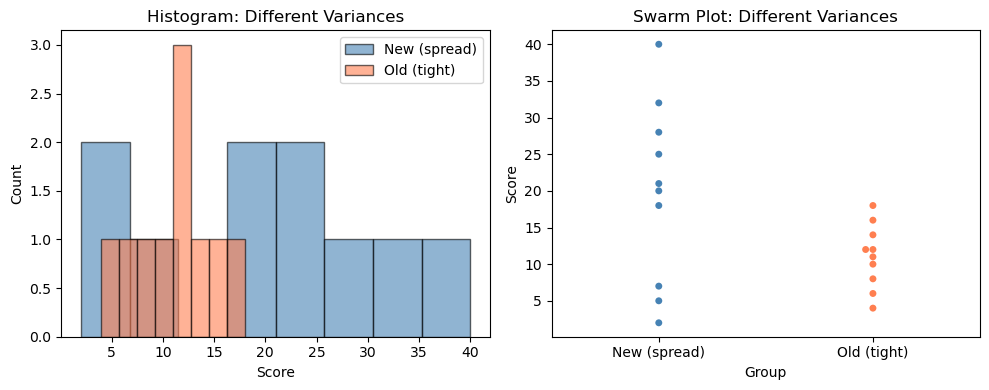

See how the New group's dots are much more spread out? That's unequal variance!


In [55]:
# Visualize the variance difference — much clearer than numbers!
# Notice how the New group is much more spread out

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left plot: overlapping histograms
axes[0].hist(new_data2, bins=8, alpha=0.6, label='New (spread)', color='steelblue', edgecolor='black')
axes[0].hist(old_data2, bins=8, alpha=0.6, label='Old (tight)', color='coral', edgecolor='black')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram: Different Variances')
axes[0].legend()

# Right plot: swarm plot
# First restructure data for seaborn
variance_df = pd.DataFrame({
    'Group': ['New (spread)']*len(new_data2) + ['Old (tight)']*len(old_data2),
    'Score': list(new_data2) + list(old_data2)
})
sns.swarmplot(data=variance_df, x='Group', y='Score', ax=axes[1], palette=['steelblue', 'coral'])
axes[1].set_title('Swarm Plot: Different Variances')

plt.tight_layout()
plt.show()

print("See how the New group's dots are much more spread out? That's unequal variance!")

In [56]:
# Levene's test formally checks if variances are equal
# If p < 0.05, variances are significantly different — use Welch's t-test

lev_stat, lev_p = stats.levene(new_data2, old_data2)

print("LEVENE'S TEST FOR EQUALITY OF VARIANCES")
print("=" * 45)
print(f"Test statistic: {lev_stat:.3f}")
print(f"p-value: {lev_p:.4f}")

if lev_p < 0.05:
    print("\nResult: Variances are UNEQUAL (p < 0.05)")
    print("Recommendation: Use Welch's t-test")
else:
    print("\nResult: Variances are similar (p >= 0.05)")
    print("Recommendation: Standard t-test is fine")

LEVENE'S TEST FOR EQUALITY OF VARIANCES
Test statistic: 6.219
p-value: 0.0226

Result: Variances are UNEQUAL (p < 0.05)
Recommendation: Use Welch's t-test


In [57]:
# Compare standard vs Welch's t-test
# The only difference in code is equal_var=True vs equal_var=False

# Standard t-test (assumes equal variances)
t_standard, p_standard = stats.ttest_ind(new_data2, old_data2, equal_var=True)

# Welch's t-test (does NOT assume equal variances)
t_welch, p_welch = stats.ttest_ind(new_data2, old_data2, equal_var=False)

print("T-TEST COMPARISON (Data Set 2)")
print("=" * 50)
print(f"\nStandard t-test (equal_var=True):  t = {t_standard:.3f}, p = {p_standard:.4f}")
print(f"Welch's t-test  (equal_var=False): t = {t_welch:.3f}, p = {p_welch:.4f}")
print("\nWhen variances are unequal, Welch's t-test is more accurate!")
print("Many statisticians recommend ALWAYS using Welch's t-test.")

T-TEST COMPARISON (Data Set 2)

Standard t-test (equal_var=True):  t = 2.114, p = 0.0487
Welch's t-test  (equal_var=False): t = 2.114, p = 0.0577

When variances are unequal, Welch's t-test is more accurate!
Many statisticians recommend ALWAYS using Welch's t-test.


---

### Your Turn: Run Levene's Test

Run Levene's test on our original t-test data (`new_data` and `old_data`) to check if those groups have equal variances.

Use `stats.levene()` just like we did above.

<details>
<summary>Click to reveal answer</summary>

```python
lev_stat, lev_p = stats.levene(new_data, old_data)
print(f"Levene's test: F = {lev_stat:.3f}, p = {lev_p:.4f}")
if lev_p < 0.05:
    print("Variances are unequal — use Welch's t-test")
else:
    print("Variances are similar — standard t-test is fine")
```

</details>

In [24]:
# Test whether new_data and old_data have equal variances
# Use stats.levene()

# YOUR CODE HERE:



---

## Part 3: One-Way ANOVA

**Question**: Does locomotor activity differ across the 8 drug treatment groups?

In JASP: ANOVA → drag Dependent Variable → drag Fixed Factors → check Post Hoc...

In Python: First we need to separate our data by group, then run the test.

In [58]:
# Separate the data by treatment group
# We'll store each group's data in a dictionary

# A dictionary uses curly braces {} and stores key:value pairs
groups = {}

# Loop through each group name and extract that group's data
for group_name in group_order:
    # anova_df[anova_df['Group'] == group_name] filters to just that group
    # ['Squares entered'] selects the column we want
    # .values converts to a numpy array
    groups[group_name] = anova_df[anova_df['Group'] == group_name]['Squares entered'].values

# Check that it worked by printing one group
print(f"Control group data: {groups['Control']}")
print(f"Control group n = {len(groups['Control'])}")

Control group data: [54 30 35 18 32 35 46 55 37 47 31 55 55 32]
Control group n = 14


/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/fsl/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


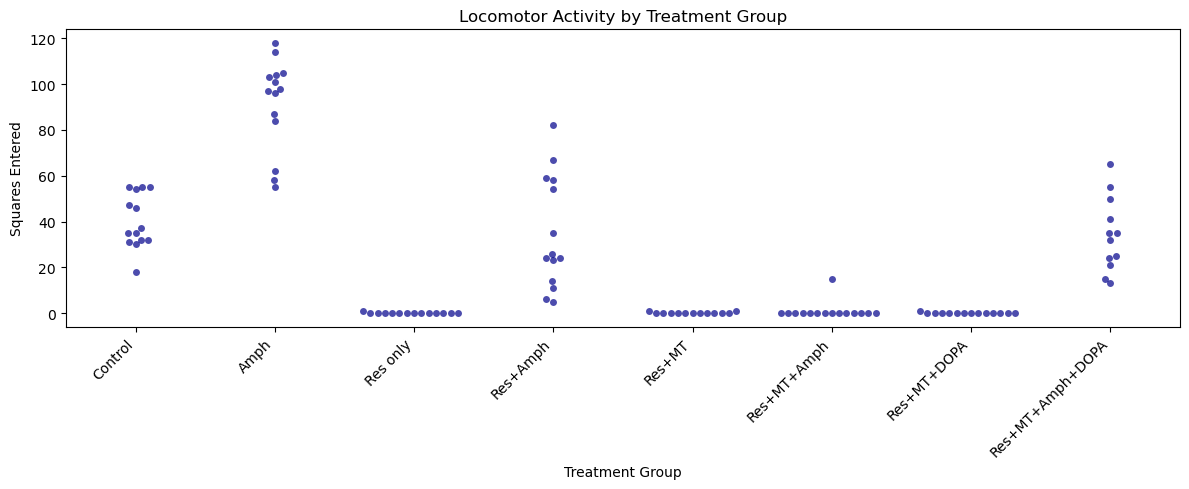

Which groups have high locomotion? Which have almost none?


In [59]:
# Before running the ANOVA, let's visualize all groups
# This swarm plot shows every data point

plt.figure(figsize=(12, 5))

# Use order= to control the group order on the x-axis
sns.swarmplot(data=anova_df, 
              x='Group', 
              y='Squares entered',
              order=group_order,
              color='darkblue',
              size=5,
              alpha=0.7)  # slight transparency

plt.xticks(rotation=45, ha='right')
plt.title('Locomotor Activity by Treatment Group')
plt.ylabel('Squares Entered')
plt.xlabel('Treatment Group')
plt.tight_layout()
plt.show()

print("Which groups have high locomotion? Which have almost none?")

In [60]:
# Run the one-way ANOVA
# stats.f_oneway() takes multiple groups as arguments
# The * unpacks our dictionary values into separate arguments

F_stat, p_value = stats.f_oneway(*groups.values())

# Calculate degrees of freedom for reporting
k = len(groups)       # number of groups
N = len(anova_df)     # total sample size
df_between = k - 1    # degrees of freedom between groups
df_within = N - k     # degrees of freedom within groups

# Format p-value properly (show "p < .001" if very small)
if p_value < 0.001:
    p_str = "p < .001"
else:
    p_str = f"p = {p_value:.4f}"

print("ONE-WAY ANOVA: Locomotor Activity by Treatment Group")
print("=" * 55)
print(f"\nF({df_between}, {df_within}) = {F_stat:.2f}, {p_str}")
print("\nCompare with JASP: F(7, 102) = 82.00, p < .001")

print("\nGroup means:")
for group_name in group_order:
    mean = groups[group_name].mean()
    print(f"  {group_name:20s}: {mean:6.2f}")

ONE-WAY ANOVA: Locomotor Activity by Treatment Group

F(7, 102) = 82.00, p < .001

Compare with JASP: F(7, 102) = 82.00, p < .001

Group means:
  Control             :  40.14
  Amph                :  91.57
  Res only            :   0.07
  Res+Amph            :  34.86
  Res+MT              :   0.15
  Res+MT+Amph         :   1.00
  Res+MT+DOPA         :   0.07
  Res+MT+Amph+DOPA    :  34.25


---

## Part 4: Post-Hoc Comparisons (Tukey HSD)

The ANOVA tells us groups differ, but **which** groups differ from each other?

With 8 groups, we have 8×7/2 = **28 pairwise comparisons**.

### Why Not Just Run 28 T-Tests?

You might think: "If I want to compare 8 groups, I'll just run all pairwise t-tests!"

**The problem:** With 28 comparisons at alpha = 0.05, you expect ~1-2 false positives by chance alone. This is called the **multiple comparisons problem**.

**Solutions:**
1. **Tukey HSD** (what we'll use) — adjusts p-values to control family-wise error rate
2. **Bonferroni correction** — multiply each p-value by the number of tests (more conservative)

In [61]:
# Import tukey_hsd from scipy.stats
from scipy.stats import tukey_hsd

# Run Tukey HSD on all groups
# We pass each group's data as a separate argument
result = tukey_hsd(*[groups[g] for g in group_order])

print("TUKEY HSD POST-HOC COMPARISONS")
print("=" * 70)
print(f"{'Comparison':<45} {'Mean Diff':>10} {'p-value':>10}")
print("-" * 70)

# Count significant comparisons
n_significant = 0

# Loop through all pairs of groups
for i in range(len(group_order)):
    for j in range(i+1, len(group_order)):
        g1, g2 = group_order[i], group_order[j]
        
        # Calculate mean difference
        mean_diff = groups[g1].mean() - groups[g2].mean()
        
        # Get p-value from the result matrix
        p_val = result.pvalue[i, j]
        
        # Add significance stars
        if p_val < 0.001:
            sig_marker = "***"
            n_significant += 1
        elif p_val < 0.01:
            sig_marker = "**"
            n_significant += 1
        elif p_val < 0.05:
            sig_marker = "*"
            n_significant += 1
        else:
            sig_marker = ""
        
        comparison = f"{g1} vs {g2}"
        print(f"{comparison:<45} {mean_diff:>10.2f} {p_val:>10.3f} {sig_marker}")

print("-" * 70)
print(f"Significant comparisons: {n_significant} of 28")
print("\n*** p < .001, ** p < .01, * p < .05")

TUKEY HSD POST-HOC COMPARISONS
Comparison                                     Mean Diff    p-value
----------------------------------------------------------------------
Control vs Amph                                   -51.43      0.000 ***
Control vs Res only                                40.07      0.000 ***
Control vs Res+Amph                                 5.29      0.965 
Control vs Res+MT                                  39.99      0.000 ***
Control vs Res+MT+Amph                             39.14      0.000 ***
Control vs Res+MT+DOPA                             40.07      0.000 ***
Control vs Res+MT+Amph+DOPA                         5.89      0.950 
Amph vs Res only                                   91.50      0.000 ***
Amph vs Res+Amph                                   56.71      0.000 ***
Amph vs Res+MT                                     91.42      0.000 ***
Amph vs Res+MT+Amph                                90.57      0.000 ***
Amph vs Res+MT+DOPA                         

In [62]:
# Highlight key pharmacological findings
# We extract specific p-values from the Tukey result matrix

# Helper function to format p-values nicely
def format_p(p):
    if p < 0.001:
        return "p < .001"
    else:
        return f"p = {p:.3f}"

print("KEY PHARMACOLOGICAL FINDINGS")
print("=" * 60)

# Get p-values from Tukey result matrix
# Indices match group_order: Control=0, Amph=1, Res only=2, etc.
p_amph_ctrl = result.pvalue[0, 1]      # Control vs Amph
p_res_ctrl = result.pvalue[0, 2]       # Control vs Res only
p_resamph_ctrl = result.pvalue[0, 3]   # Control vs Res+Amph
p_final_ctrl = result.pvalue[0, 7]     # Control vs Res+MT+Amph+DOPA

print("\n1. Amphetamine INCREASES locomotion:")
diff = groups['Amph'].mean() - groups['Control'].mean()
print(f"   Amph vs Control: +{diff:.1f} squares ({format_p(p_amph_ctrl)})")

print("\n2. Reserpine ABOLISHES locomotion:")
diff = groups['Res only'].mean() - groups['Control'].mean()
print(f"   Res only vs Control: {diff:.1f} squares ({format_p(p_res_ctrl)})")

print("\n3. Amphetamine PARTIALLY restores function after reserpine:")
print(f"   Res+Amph mean: {groups['Res+Amph'].mean():.1f} (vs Control: {format_p(p_resamph_ctrl)})")

print("\n4. MT blocks the amphetamine restoration:")
print(f"   Res+MT+Amph mean: {groups['Res+MT+Amph'].mean():.1f} (essentially zero)")

print("\n5. L-DOPA + Amph can restore function even with MT:")
print(f"   Res+MT+Amph+DOPA mean: {groups['Res+MT+Amph+DOPA'].mean():.1f} (vs Control: {format_p(p_final_ctrl)})")

print("\nThese findings demonstrate the dopamine hypothesis of locomotion!")

KEY PHARMACOLOGICAL FINDINGS

1. Amphetamine INCREASES locomotion:
   Amph vs Control: +51.4 squares (p < .001)

2. Reserpine ABOLISHES locomotion:
   Res only vs Control: -40.1 squares (p < .001)

3. Amphetamine PARTIALLY restores function after reserpine:
   Res+Amph mean: 34.9 (vs Control: p = 0.965)

4. MT blocks the amphetamine restoration:
   Res+MT+Amph mean: 1.0 (essentially zero)

5. L-DOPA + Amph can restore function even with MT:
   Res+MT+Amph+DOPA mean: 34.2 (vs Control: p = 0.950)

These findings demonstrate the dopamine hypothesis of locomotion!


---

### Your Turn: Run a T-Test Between Two Groups

Run an independent samples t-test comparing the `Control` group to the `Amph` group.

Use `stats.ttest_ind()` with the data from the `groups` dictionary.

Hint: Access Control data with `groups['Control']` and Amph data with `groups['Amph']`

<details>
<summary>Click to reveal answer</summary>

```python
t_stat, p_val = stats.ttest_ind(groups['Control'], groups['Amph'])
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Control mean: {groups['Control'].mean():.2f}")
print(f"Amph mean: {groups['Amph'].mean():.2f}")
```

</details>

In [ ]:
# Compare Control to Amph using stats.ttest_ind()

# YOUR CODE HERE:



---

## Part 5: Things Python Can Do That JASP Can't

### Advantage 1: Automation

What if you needed to run pairwise comparisons for multiple outcome measures? In JASP, you'd click through menus dozens of times. In Python, it's a loop.

**Warning:** Running many t-tests without correction inflates your false positive rate! This is just to demonstrate automation — always use Tukey HSD or Bonferroni correction for real analyses.

In [63]:
# Run all 28 pairwise t-tests in a loop
# This demonstrates automation — NOT recommended without correction!

print("AUTOMATED PAIRWISE T-TESTS (28 comparisons)")
print("=" * 55)

# Store results in a list
results_list = []

# Nested loops go through all pairs
for i in range(len(group_order)):
    for j in range(i+1, len(group_order)):  # j > i avoids duplicates
        g1, g2 = group_order[i], group_order[j]
        
        # Run t-test
        t, p = stats.ttest_ind(groups[g1], groups[g2])
        
        # Store in our results list
        results_list.append({
            'Group 1': g1,
            'Group 2': g2,
            't': t,
            'p': p,
            'significant': p < 0.05
        })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results_list)

print(f"\nRan {len(results_df)} t-tests in a loop.")
print(f"Significant results (uncorrected): {results_df['significant'].sum()}")

# Apply Bonferroni correction
# Multiply each p-value by the number of tests
results_df['p_bonferroni'] = (results_df['p'] * len(results_df)).clip(upper=1.0)
results_df['sig_corrected'] = results_df['p_bonferroni'] < 0.05

print(f"Significant after Bonferroni correction: {results_df['sig_corrected'].sum()}")

print("\nIn JASP, you'd click through 28 separate comparisons.")
print("In Python, 10 lines of code.")

AUTOMATED PAIRWISE T-TESTS (28 comparisons)

Ran 28 t-tests in a loop.
Significant results (uncorrected): 19
Significant after Bonferroni correction: 19

In JASP, you'd click through 28 separate comparisons.
In Python, 10 lines of code.


### Advantage 2: Custom Visualizations

JASP gives you canned plots. Python gives you full control over every aspect of your figures.

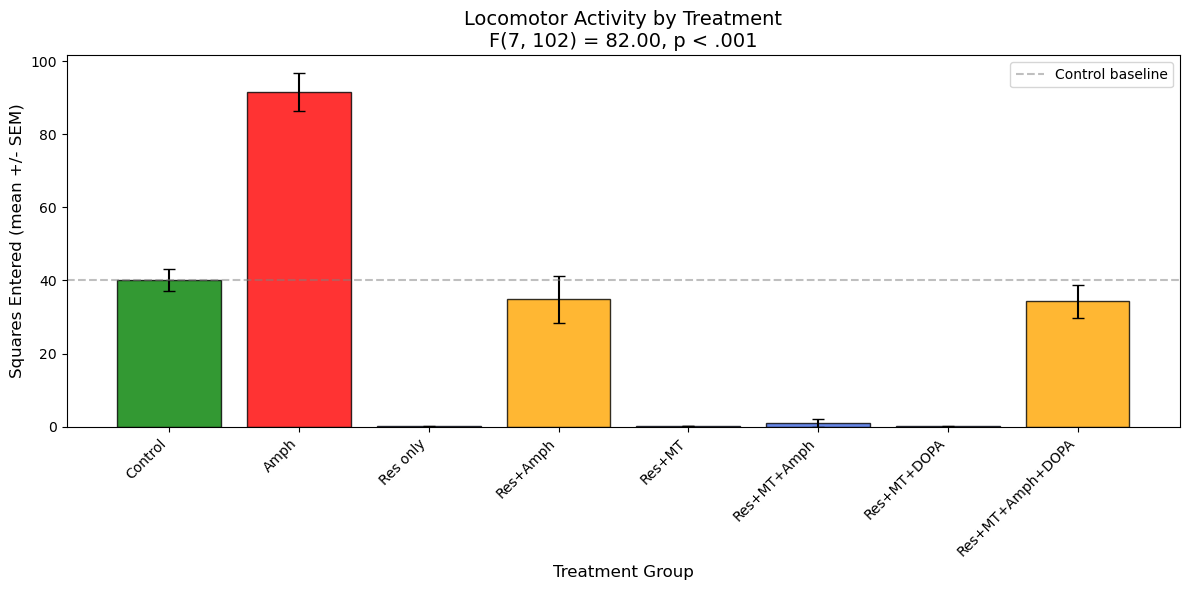

Color key: Green=Control, Red=Stimulant, Blue=Depleted, Orange=Restored

Try changing the colors list above and re-running!


In [64]:
# Create a publication-quality bar plot with error bars

fig, ax = plt.subplots(figsize=(12, 6))

# Calculate means and standard errors for each group
means = [groups[g].mean() for g in group_order]
sems = [groups[g].std() / np.sqrt(len(groups[g])) for g in group_order]

# Color code by drug effect
# Try changing these colors! Options: 'red', 'blue', 'green', 'orange', 'purple', etc.
colors = ['green',      # Control
          'red',        # Amph (stimulant effect)
          'royalblue',  # Res only (depleted)
          'orange',     # Res+Amph (partial restoration)
          'royalblue',  # Res+MT
          'royalblue',  # Res+MT+Amph
          'royalblue',  # Res+MT+DOPA
          'orange']     # Res+MT+Amph+DOPA (restoration)

# Create the bar plot
# yerr adds error bars, capsize sets the width of the error bar caps
bars = ax.bar(range(len(group_order)), means, yerr=sems, 
              color=colors, edgecolor='black', capsize=4, alpha=0.8)

# Customize the plot
ax.set_xticks(range(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Squares Entered (mean +/- SEM)', fontsize=12)
ax.set_xlabel('Treatment Group', fontsize=12)

# Add title with our computed statistics
if p_value < 0.001:
    title_p = "p < .001"
else:
    title_p = f"p = {p_value:.3f}"
ax.set_title(f'Locomotor Activity by Treatment\nF({df_between}, {df_within}) = {F_stat:.2f}, {title_p}', fontsize=14)

# Add a horizontal reference line at Control mean
ax.axhline(y=groups['Control'].mean(), color='gray', linestyle='--', alpha=0.5, label='Control baseline')
ax.legend()

plt.tight_layout()
plt.show()

print("Color key: Green=Control, Red=Stimulant, Blue=Depleted, Orange=Restored")
print("\nTry changing the colors list above and re-running!")

### Advantage 3: Bootstrap Confidence Intervals

This isn't even an option in JASP's menus. In Python, it's straightforward.

### Why Bootstrap?

Traditional statistics assume your data follows a specific distribution (usually normal). But what if it doesn't? Or what if you have a small sample?

**Bootstrapping** lets you estimate uncertainty without those assumptions:
1. Resample your data (with replacement) thousands of times
2. Calculate your statistic each time
3. The spread of those results IS your confidence interval

This is especially useful when:
- Sample sizes are small
- Data is skewed or has outliers
- You want to verify your results aren't dependent on distributional assumptions

In [65]:
# Bootstrap confidence interval for Amph vs Control difference

amph = groups['Amph']
control = groups['Control']

# Number of bootstrap samples — more = more precise but slower
n_bootstrap = 10000

# Store bootstrapped differences
boot_diffs = []

# Set random seed for reproducibility
np.random.seed(42)

# Bootstrap loop
for _ in range(n_bootstrap):
    # Resample WITH replacement (some values will be picked multiple times)
    boot_amph = np.random.choice(amph, size=len(amph), replace=True)
    boot_ctrl = np.random.choice(control, size=len(control), replace=True)
    
    # Calculate mean difference for this resample
    boot_diffs.append(boot_amph.mean() - boot_ctrl.mean())

boot_diffs = np.array(boot_diffs)

# Calculate confidence interval using percentiles
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)

print("BOOTSTRAP ANALYSIS (10,000 resamples)")
print("=" * 45)
print(f"\nAmphetamine vs Control difference:")
print(f"  Observed difference: {amph.mean() - control.mean():.1f} squares")
print(f"  Bootstrap mean:      {np.mean(boot_diffs):.1f} squares")
print(f"  95% CI: [{ci_lower:.1f}, {ci_upper:.1f}]")
print(f"\nProportion where Amph > Control: {(boot_diffs > 0).mean():.1%}")

BOOTSTRAP ANALYSIS (10,000 resamples)

Amphetamine vs Control difference:
  Observed difference: 51.4 squares
  Bootstrap mean:      51.5 squares
  95% CI: [39.6, 62.9]

Proportion where Amph > Control: 100.0%


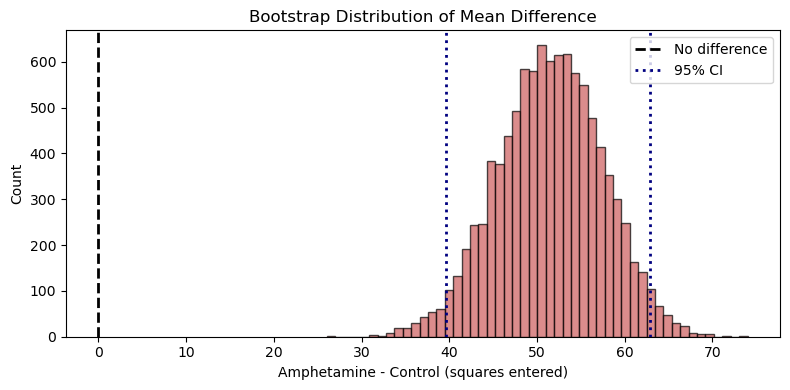

The entire distribution is above zero — strong evidence that Amph > Control!


In [66]:
# Visualize the bootstrap distribution

plt.figure(figsize=(8, 4))

# Histogram of bootstrap differences
plt.hist(boot_diffs, bins=50, edgecolor='black', alpha=0.7, color='indianred')

# Add vertical lines for reference
plt.axvline(0, color='black', linewidth=2, linestyle='--', label='No difference')
plt.axvline(ci_lower, color='navy', linewidth=2, linestyle=':', label='95% CI')
plt.axvline(ci_upper, color='navy', linewidth=2, linestyle=':')

plt.xlabel('Amphetamine - Control (squares entered)')
plt.ylabel('Count')
plt.title('Bootstrap Distribution of Mean Difference')
plt.legend()
plt.tight_layout()
plt.show()

print("The entire distribution is above zero — strong evidence that Amph > Control!")

### Advantage 4: Reproducibility

If someone asks *"How did you get that result?"*, you can hand them this notebook. Every step is documented, every analysis is re-runnable.

In JASP, you'd have to write out: *"I clicked ANOVA, then dragged Squares entered into the dependent variable box, then I dragged Group into the grouping variable, then I checked the Tukey option under Post Hoc..."*

In Python, the code **is** the documentation.

---

## Common Errors and What They Mean

When you see an error, don't panic! Here's what common errors mean:

| Error | What it means | How to fix |
|-------|---------------|------------|
| `FileNotFoundError` | Python can't find the file | Check filename spelling, make sure file is in the same folder as the notebook |
| `KeyError: 'column_name'` | That column doesn't exist in your data | Check spelling with `df.columns` to see all column names |
| `ValueError: could not convert string to float` | There's text in a column that should be numbers | Check for header rows or non-numeric data with `df.head()` |
| `NameError: name 'x' is not defined` | You're using a variable before creating it | Make sure you ran the cell that creates that variable first |
| `IndentationError` | Python code isn't lined up correctly | Check that spaces/tabs are consistent |

**Pro tip:** Read error messages from the bottom up — the last line usually tells you what went wrong!

---

## Bonus: Repeated Measures ANOVA (Optional)

Repeated measures designs (same subjects measured multiple times) require special handling. Python can do this using the `pingouin` library, but it requires additional setup.

**This section is optional and won't be covered in today's lab.**

If you want to explore on your own:
1. Install pingouin: `pip install pingouin`
2. See the documentation: [pingouin.rm_anova](https://pingouin-stats.org/generated/pingouin.rm_anova.html)

Example code (don't run unless you have pingouin installed):

```python
import pingouin as pg

# Repeated measures ANOVA
pg.rm_anova(data=df, dv='Score', within='Time', subject='Subject')

# Mixed ANOVA (within + between factors)
pg.mixed_anova(data=df, dv='Score', within='Time', between='Group', subject='Subject')
```

---

## Checkpoint: JASP vs Python

You just replicated **every test** from the JASP lab in Python. Let's count the lines of code:

| Test | Python Code | JASP |
|------|-------------|------|
| Independent t-test | `stats.ttest_ind(a, b)` — **1 line** | 4-5 clicks, drag variables |
| Paired t-test | `stats.ttest_rel(a, b)` — **1 line** | Reshape data, 4-5 clicks |
| Welch's t-test | `stats.ttest_ind(a, b, equal_var=False)` — **1 line** | Buried in options menu |
| Levene's test | `stats.levene(a, b)` — **1 line** | Separate analysis |
| One-way ANOVA | `stats.f_oneway(g1, g2, ...)` — **1 line** | 3-4 clicks, check boxes |
| Tukey HSD | `tukey_hsd(g1, g2, ...)` — **1 line** | Check post-hoc options |
| 28 pairwise tests | Loop: 10 lines total | Click 28x through menus |

The tests are equally simple. **But Python can do things JASP cannot.** We demonstrated:
- Automation (loop through all comparisons)
- Custom publication-quality visualizations
- Bootstrap confidence intervals
- Complete reproducibility

---

## Summary: The Python Cheat Sheet

| What you want to do | Python code |
|---|---|
| Load Excel data | `df = pd.read_excel('file.xlsx')` |
| Load CSV data | `df = pd.read_csv('file.csv')` |
| View first rows | `df.head()` |
| Check data structure | `df.info()` |
| Check for missing values | `df.isna().sum()` |
| Group means | `df.groupby('Group')['DV'].mean()` |
| Descriptive stats | `df.groupby('Group')['DV'].agg(['count', 'mean', 'std'])` |
| Independent t-test | `stats.ttest_ind(group1, group2)` |
| Welch's t-test | `stats.ttest_ind(group1, group2, equal_var=False)` |
| Paired t-test | `stats.ttest_rel(pre, post)` |
| Levene's test | `stats.levene(group1, group2)` |
| One-way ANOVA | `stats.f_oneway(g1, g2, g3, ...)` |
| Tukey HSD | `tukey_hsd(g1, g2, g3, ...)` |
| Histogram | `plt.hist(x, bins=10, color='blue')` |
| Swarm plot | `sns.swarmplot(data=df, x='Group', y='Value')` |
| Bar plot | `plt.bar(x, heights, yerr=errors)` |

**That's it.** With these functions, you can do everything JASP does — and much more.

You don't have to memorize them. There is no test. The more you use them, the more you will remember.

**Remember:** The skills you learned today transfer directly to machine learning, neuroimaging, bioinformatics, and countless other fields!

For more, check out this great talk on why data science (and statistics in general) is better when done with code instead of with a GUI:


https://www.youtube.com/watch?v=cpbtcsGE0OA

It's a long video, but you can find a summary of the key points here 

https://asterisk.dynevor.org/you-cant-do-data-science-in-a-gui.html